# Preparing COSMOS shape catalog

In this notebook, we prepare the full (with both bright and faint galaxies) COSMOS shape catalog using 
weak lensing measurements from [Schrabback et al. 2010](https://ui.adsabs.harvard.edu/abs/2010A%26A...516A..63S/abstract).

Most important catalog's columns described in Tim's README:
-   1 Ra                  
-   2 Dec                 
-   3 Xs                  Mosaic X-Y coordinates (North up, East left)
-   4 Ys                  with pixel scale 0.186''. Can directly be used with      e1iso_snCal_rot4  e2iso_snCal_rot4            
-   5 MAG_AUTO            Kron-like elliptical aperture magnitude         [mag]   
-   6 e1iso_rot4_gr_snCal BEST gamma1-estimate for North=up  all fixes included   
-   7 e2iso_rot4_gr_snCal BEST gamma2-estimate for North=up  all fixes included
-  12 nhweight_int        shear-measurement weight (similar to Hoekstra et al.)
-  21 zphot               best-fit photoz estimate
-  37 z_problem           Potentially high redshift (zphot<0.6, MAG_AUTO>24)                                              0=fine, 1=bad (i>24), 2=verybad (i>24, zphot_sec>0)                    
For a proper redshift calibration you probably want to select z_problem=0
or z_problem<=1 (in the latter case you only exclude those galaxies
with a sig. secondary redshift peak, which is probably sufficient).

## Load lensing data

**Loading catalog with bright galaxies**

In [1]:
%pylab inline
from astropy.table import Table
from astropy.io import fits

cat_bright = Table.read('../data/cosmos_bright_cat.asc', format='ascii')

Populating the interactive namespace from numpy and matplotlib


**Loading catalog with faint galaxies**

In [2]:
cat_faint = Table.read('../data/z_cos30/cosmos_faint_cat.asc', format='ascii')

Redshift distrubtion of faint galaxies

Text(0.5, 1.0, 'bright galaxies redshift distribution')

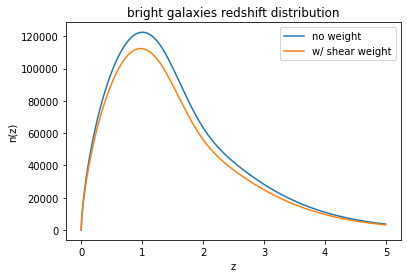

In [3]:
nz_w0 = Table.read('../data/z_cos30/cosmos_zdist_faint_w0.asc', format='ascii')
nz_w1 = Table.read('../data/z_cos30/cosmos_zdist_faint_w1.asc', format='ascii')

plot(nz_w0['col1'], nz_w0['col2'], label='no weight')
plot(nz_w1['col1'], nz_w1['col2'], label='w/ shear weight')
xlabel('z')
ylabel('n(z)')
legend()
title('bright galaxies redshift distribution')

## Apply necessary quality cuts

Discarding galaxies with redshift measurment problem

In [4]:
# We actually keep everything, only potentially high z galaxies
selection = ((cat_bright['z_problem'] == 0)
            )
# Restrict catalog to these objects
cat_bright = cat_bright[selection]

In [5]:
print(cat_bright.keys())

['Ra', 'Dec', 'Xs', 'Ys', 'MAG_AUTO', 'e1iso_rot4_gr_snCal', 'e2iso_rot4_gr_snCal', 'e1iso_rot1_gr_snCal', 'e2iso_rot1_gr_snCal', 'e1iso_snCal_rot4', 'e2iso_snCal_rot4', 'nhweight_int', 'rh', 'rg', 'next_dist', 'region', 'snratio', 'e1corr_rot', 'e2corr_rot', 'mod_gal', 'zphot', 'zerr_68_min', 'zerr_68_max', 'zerr_99_min', 'zerr_99_max', 'imag', 'chi_gal', 'zphot_sec', 'chi_sec', 'mod_sec', 'Mv', 'jmag', 'jmagerr', 'kmag', 'kmagerr', 'z_problem', 'LRG']


In [6]:
# Creat the full catalog
type(cat_bright)

astropy.table.table.Table

Text(0.5, 0, 'faint galaxies')

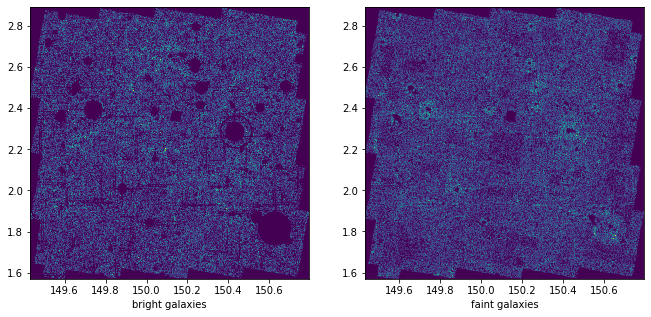

In [7]:
figure(figsize=(11, 5))
subplot(121)
xlabel("bright galaxies")
hist2d(cat_bright['Ra'], cat_bright['Dec'], 320)
subplot(122)
hist2d(cat_faint['Ra'], cat_faint['Dec'], 320)
xlabel("faint galaxies")

In [8]:
# merge catalog
cat_full = Table()
cat_full['Ra'] = np.concatenate([cat_bright['Ra'], cat_faint['Ra']])
cat_full['Dec'] = np.concatenate([cat_bright['Dec'], cat_faint['Dec']])
cat_full['e1iso_rot4_gr_snCal'] = np.concatenate([cat_bright['e1iso_rot4_gr_snCal'], cat_faint['e1iso_rot4_gr_snCal']])
cat_full['e2iso_rot4_gr_snCal'] = np.concatenate([cat_bright['e2iso_rot4_gr_snCal'], cat_faint['e2iso_rot4_gr_snCal']])
cat_full['nhweight_int'] = np.concatenate([cat_bright['nhweight_int'], cat_faint['nhweight_int']])

In [9]:
cat_full

Ra,Dec,e1iso_rot4_gr_snCal,e2iso_rot4_gr_snCal,nhweight_int
float64,float64,float64,float64,float64
149.4959651,2.499495782,0.0392358,-0.574703,1.2926
149.4963267,2.504209582,-0.515389,-0.374299,1.12024
149.4928198,2.487398982,-0.185595,0.327772,1.72788
149.4862006,2.455142982,0.113546,0.00384063,0.429384
149.4883566,2.467923482,-0.170634,0.216532,0.770267
149.4872945,2.462888682,-0.142334,-0.149079,1.05549
149.4936394,2.499830082,0.561479,0.110478,1.46717
149.4877778,2.466954182,0.0983129,-0.30416,0.561906
149.4855088,2.460576982,0.00236967,0.0267271,1.35167


## Bin ellipticity catalog on map with given pixel size

| Simulation    | Resolution (arcmin/pixel)  |
|:------------- |:--------------------------:|
| [MassiveNuS](http://columbialensing.org/#massivenus)    | 0.4                        |
| [kappaTNG](http://columbialensing.org/#tng)             | 0.29                       |

In [10]:
from lenspack.utils import bin2d
from lenspack.image.inversion import ks93
from lenspack.peaks import find_peaks2d

# Compute boundaries of the field so that it fits in a 320x320 map
# with pixel resolution of 0.29 arcmin
resolution = 0.29

size = 320 * resolution / 60.

ra = median(cat_full['Ra'])
dec = median(cat_full['Dec'])
extent = [ra - size/2, ra + size/2, dec - size/2, dec + size/2]

In [11]:
# Bin ellipticity components based on galaxy position into a 320x320 map
e1map, e2map = bin2d(cat_full['Ra'], cat_full['Dec'], 
                     v=(cat_full['e1iso_rot4_gr_snCal'], cat_full['e2iso_rot4_gr_snCal']), 
                     w=cat_full['nhweight_int'],
                     npix=320,
                     extent=extent)

Text(0.5, 0, 'e2')

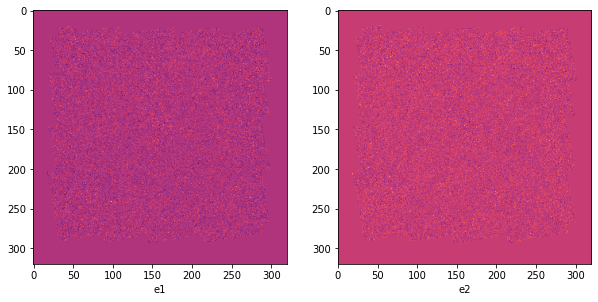

In [12]:
figure(figsize=[10,5])
subplot(121)
imshow(e1map, cmap='magma')
xlabel('e1')
subplot(122)
imshow(e2map, cmap='magma')
xlabel('e2')

In [13]:
#fits.writeto('cosmos_full_e1_0.4arcmin.fits', e1map.astype('float32'))
#fits.writeto('cosmos_full_e2_0.4arcmin.fits', -e2map.astype('float32'))

## Create map of number of galaxies per pixel

In [14]:
n_gal_map_bright, _, _ = np.histogram2d(cat_bright['Ra'], cat_bright['Dec'], bins=(320, 320), normed=False)
n_gal_map_faint, _, _ = np.histogram2d(cat_faint['Ra'], cat_faint['Dec'], bins=(320, 320), normed=False)
n_gal_map_full, _, _ = np.histogram2d(cat_full['Ra'], cat_full['Dec'], bins=(320, 320), normed=False)

#fits.writeto('cosmos_full_n_gal_0.29arcmin.fits', n_gal_map_full.astype('float32'))

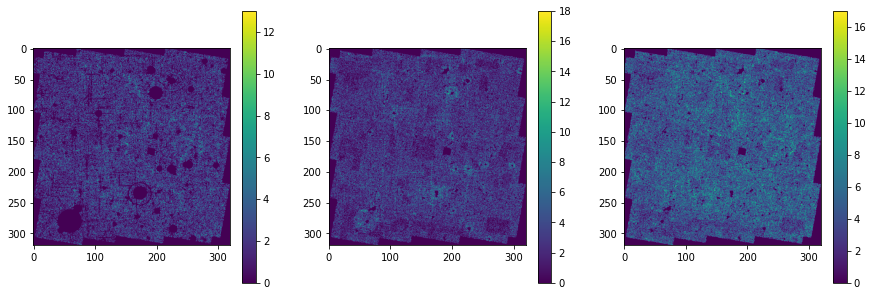

In [15]:
figure(figsize=(15, 5))
subplot(131)
imshow(n_gal_map_bright)
colorbar()
subplot(132)
imshow(n_gal_map_faint)
colorbar()
subplot(133)
imshow(n_gal_map_full)
colorbar()

## Creat binary mask for empty pixels

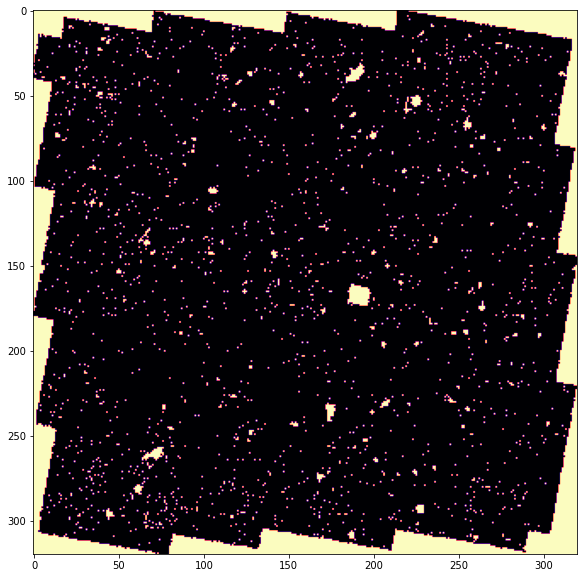

In [16]:
# Data mask
figure(figsize=[10,10])
m = n_gal_map_full == 0
imshow(m,cmap='magma')
#fits.writeto('cosmos_full_mask_0.29arcmin.fits', (1.-m).astype('float32'))

##  Recover convergence via Kaiser-Squires inversion

In [17]:
kappaE, kappaB = ks93(e1map, -e2map) # I think e2 is inverted...

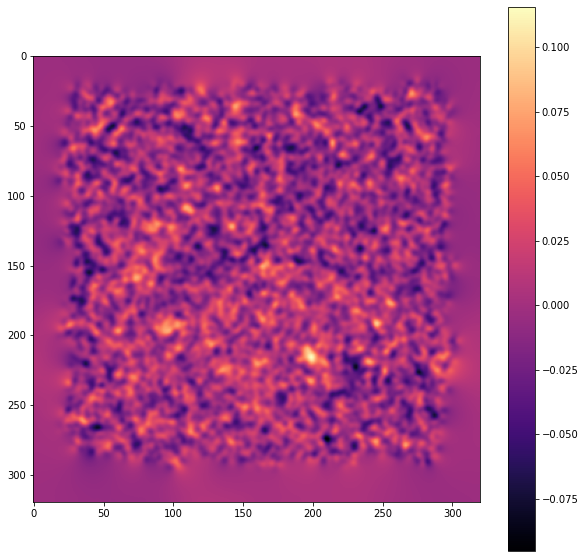

In [18]:
from scipy.ndimage import gaussian_filter
figure(figsize=[10,10])
mappable = imshow(gaussian_filter(kappaE,2)[:,::-1], cmap='magma');colorbar()

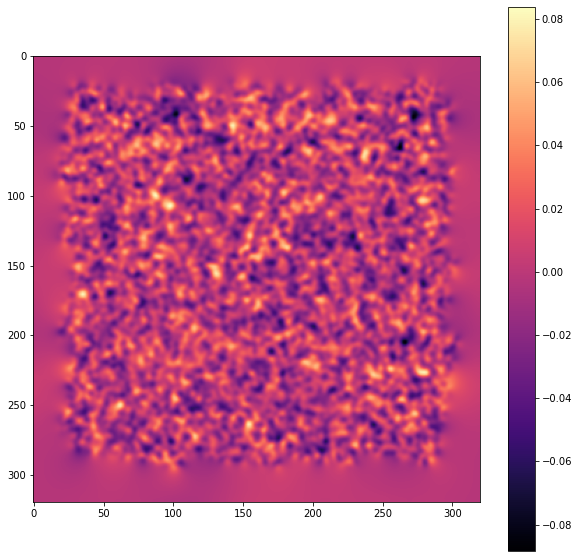

In [19]:
figure(figsize=[10,10])
mappable = imshow(gaussian_filter(kappaB,2)[:,::-1], cmap='magma');colorbar()

# Redshift distrubution of the full catalog

We want the distrubtion over 40 source redshifts from zs = 0 to zs = 2.6 to match kappaTNG configurations.

0.01 5.446
165159


Text(0.5, 1.0, 'bright galaxies redshift distribution')

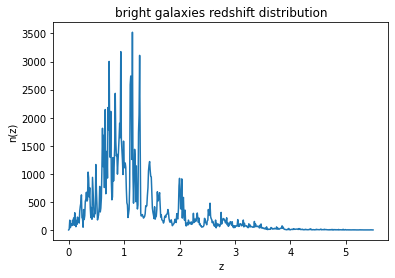

In [20]:
# Bright galaxies
print(np.min(cat_bright['zphot']), np.max(cat_bright['zphot']))

z = np.arange(0, 5.5, .01)
nz_bright = np.zeros(z.shape)
for z_g in cat_bright['zphot']:
    nz_bright[int(np.ceil(z_g*100))] += 1


print(len(cat_bright['zphot']))
#print(np.sum(nz))
    
plot(z, nz_bright)
xlabel('z')
ylabel('n(z)')
title('bright galaxies redshift distribution')

Text(0.5, 1.0, 'redshift distribution')

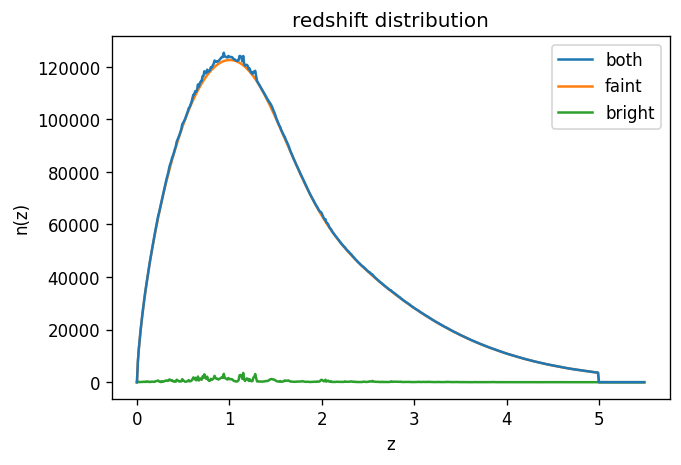

In [76]:
nz_faint = np.zeros(z.shape)
nz_faint[0:500] = nz_w0['col2']

nz_faint_w = np.zeros(z.shape)
nz_faint_w[0:500] = nz_w0['col2']

nz_full = nz_faint + nz_bright
nz_full_w = nz_faint_w + nz_bright

figure(dpi=120)
plot(z, nz_full, zorder=1, label='both')
plot(z, nz_faint, zorder=0, label='faint')
plot(z, nz_bright, zorder=0, label='bright')
xlabel('z')
ylabel('n(z)')
legend()
title('redshift distribution')

In [77]:
all_z = []
for i,redshift in enumerate(z):
    for _ in range(int(nz_full[i])):
        all_z.append(redshift)

med = np.median(all_z)

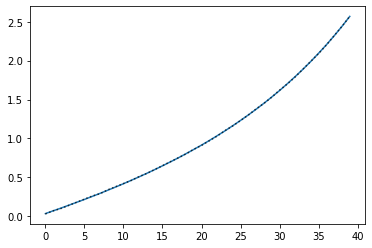

In [78]:
source_redshift = [0.034, 0.070, 0.105, 0.142, 0.179, 0.216, 0.255, 0.294, 0.335, 0.376,
                   0.418, 0.462, 0.506, 0.552, 0.599, 0.648, 0.698, 0.749, 0.803, 0.858,
                   0.914, 0.973, 1.034, 1.097, 1.163, 1.231, 1.302, 1.375, 1.452, 1.532,
                   1.615, 1.703, 1.794, 1.889, 1.989, 2.094, 2.203, 2.319, 2.440, 2.568]

plot(np.arange(40), source_redshift)
plot(np.arange(40), np.round(source_redshift, 2), color='black', alpha=.7, linestyle=':')

Text(0.5, 1.0, 'redshift distribution')

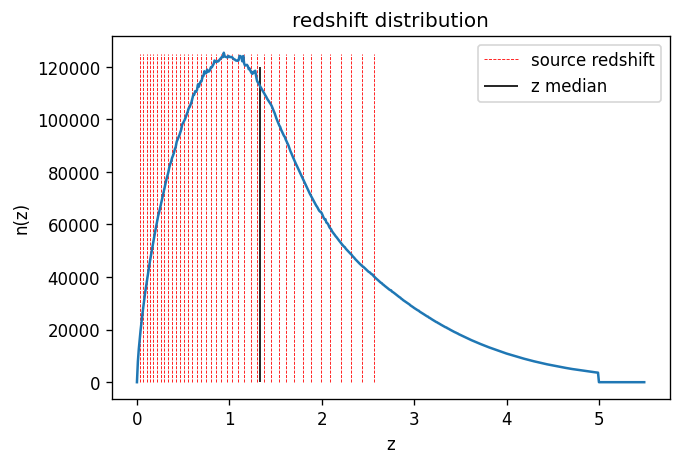

In [82]:
figure(dpi=120)

plot(z, nz_full)

vlines(source_redshift, ymin=0, ymax=125000, color='red', linewidth=.5, label='source redshift', linestyle='--')
vlines(med, ymin=0, ymax=120000, color='black', linewidth=1, label='z median')
xlabel('z')
ylabel('n(z)')
legend()
title('redshift distribution')

In [81]:
print('z median of the bright catalog:', np.median(cat_bright['zphot']))
print('z median of the full catalog:', med)

z median of the bright catalog: 1.018
z median of the full catalog: 1.33


source redshidt: [  3   7  10  14  18  22  26  28  34  38  42  46  51  55  60  65  70  75
  80  86  91  97 103 110 115 123 130 138 145 153 162 170 179 189 199 209
 220 231 244 257]


Text(0.5, 1.0, 'galaxy redshift distribution for the $\\kappa$TNG sources')

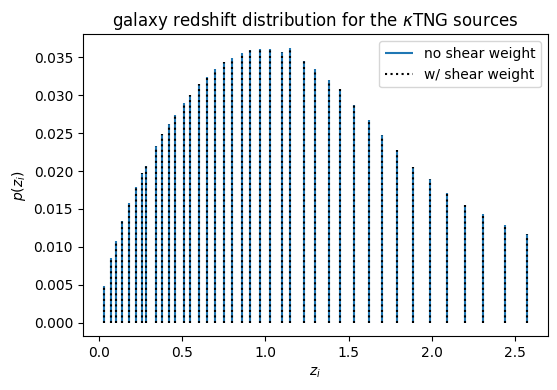

In [92]:
s_z = np.array(np.round(source_redshift, 2)*100, dtype=np.int)
print('source redshidt:', s_z)

p_z = nz_full[s_z]
p_z /= np.sum(p_z)

p_z_w = nz_full[s_z]
p_z_w /= np.sum(p_z_w)

figure(dpi=100)

vlines(s_z/100, ymin=0, ymax=p_z, label='no shear weight')#, color='red', linewidth=.5, label='source redshift', linestyle='--')
vlines(s_z/100, ymin=0, ymax=p_z_w, color='black', linestyle=':', label='w/ shear weight')
xlabel(r'$z_i$')
ylabel(r'$p(z_i)$')
legend()
title('galaxy redshift distribution for the $\kappa$TNG sources')

Text(0.5, 0, 'nhweight_int')

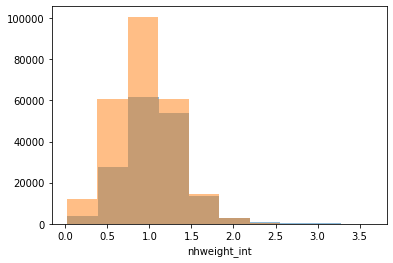

In [26]:
hist(cat_bright['nhweight_int'],  alpha=.5, label='bright')
hist(cat_faint['nhweight_int'], alpha=.5, label='faint')
xlabel('nhweight_int')

Text(0, 0.5, 'nhweight_int')

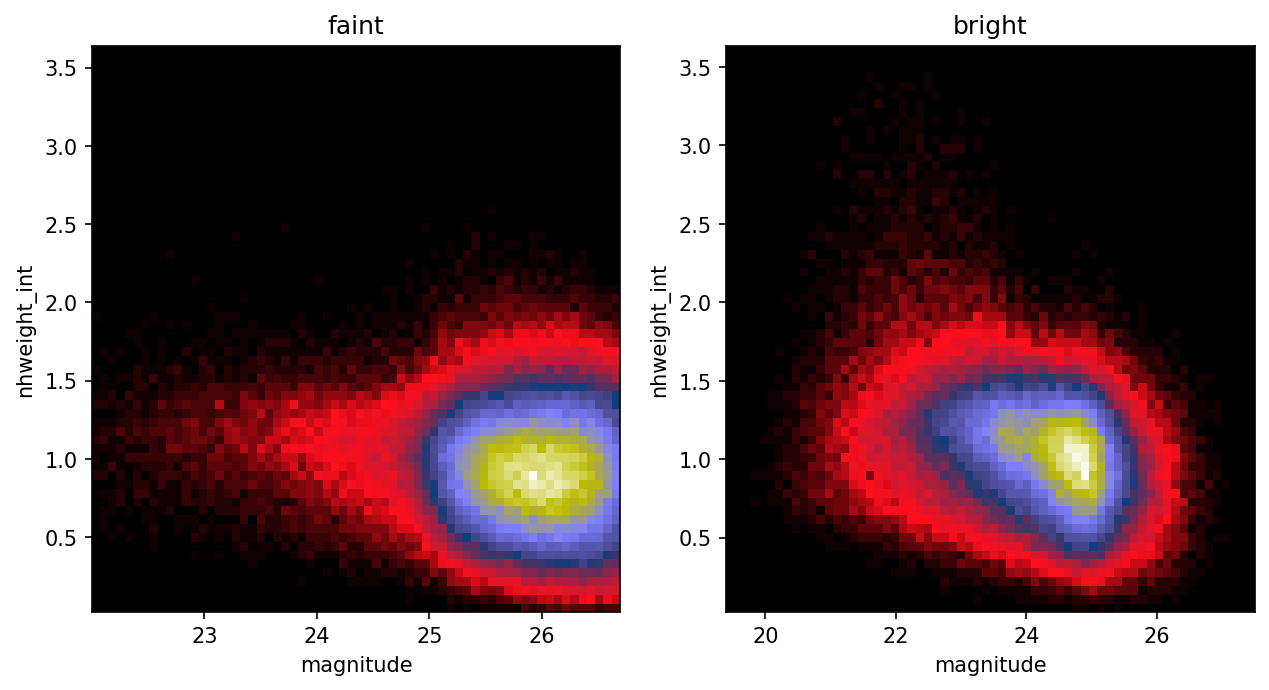

In [27]:
figure(figsize=(10, 5), dpi=150)


subplot(121)
title('faint')
hist2d(cat_faint['MAG_AUTO'], cat_faint['nhweight_int'], 64, cmap='gist_stern');
xlabel('magnitude')
ylabel('nhweight_int')

subplot(122)
title('bright')
hist2d(cat_bright['MAG_AUTO'], cat_bright['nhweight_int'], 64, cmap='gist_stern');
xlabel('magnitude')
ylabel('nhweight_int')

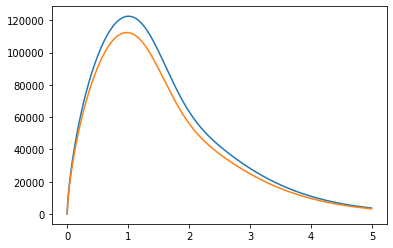

In [28]:
plot(nz_w0['col1'], nz_w0['col2'])
plot(nz_w1['col1'], nz_w1['col2'])